<a href="https://colab.research.google.com/github/ryanditata/dataMining/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
df = pd.read_csv("train.csv")

# Preview data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print("Ukuran Dataset:", df.shape)
print("\nInfo Dataset:")
df.info()

print("\nStatistik Deskriptif:")
df.describe()

Ukuran Dataset: (1460, 81)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Missing %
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945


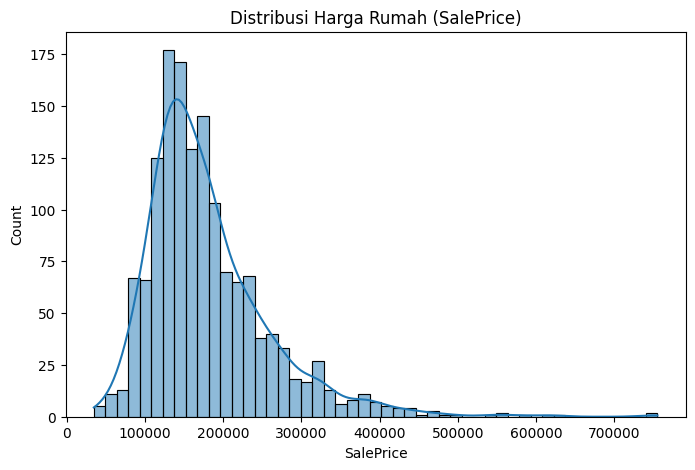

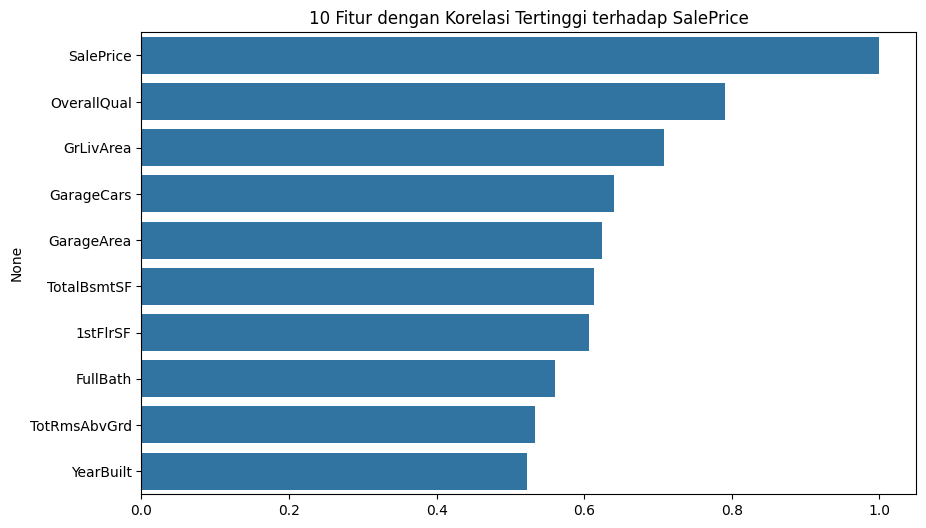

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribusi Harga Rumah (SalePrice)")
plt.show()

corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

corr.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=corr.head(10).values, y=corr.head(10).index)
plt.title("10 Fitur dengan Korelasi Tertinggi terhadap SalePrice")
plt.show()

In [ ]:
threshold = 0.5
df_clean = df.loc[:, df.isnull().mean() < threshold].copy()

# Numerik → median
num_cols = df_clean.select_dtypes(include=['int64','float64']).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Kategorikal → modus
cat_cols = df_clean.select_dtypes(include=['object']).columns
df_clean[cat_cols] = df_clean[cat_cols].fillna(df_clean[cat_cols].mode().iloc[0])

In [ ]:
df_clean['SalePrice_log'] = np.log1p(df_clean['SalePrice'])

df_clean['TotalSF'] = (
    df_clean['TotalBsmtSF'] +
    df_clean['1stFlrSF'] +
    df_clean['2ndFlrSF']
)

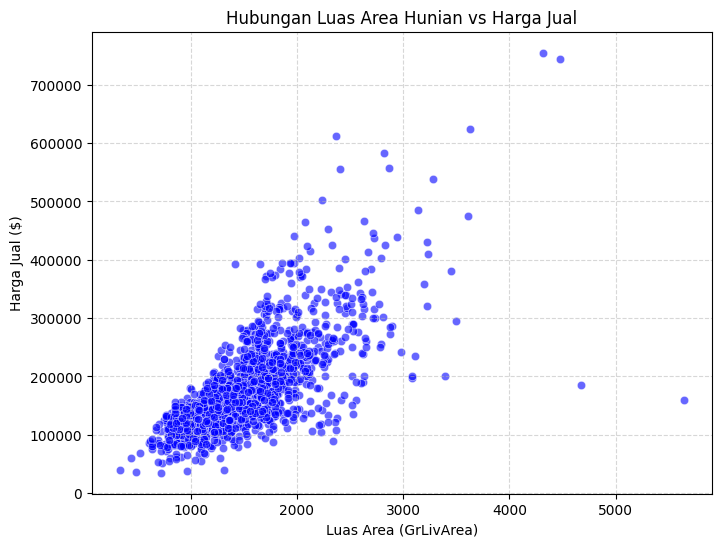

In [ ]:
# Visualisasi Hubungan Luas Area vs Harga
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='GrLivArea', y='SalePrice', alpha=0.6, color='blue')
plt.title('Hubungan Luas Area Hunian vs Harga Jual')
plt.xlabel('Luas Area (GrLivArea)')
plt.ylabel('Harga Jual ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)

scaler = StandardScaler()

scaled_features = scaler.fit_transform(
    df_encoded.drop(columns=['SalePrice', 'SalePrice_log'])
)

X = pd.DataFrame(scaled_features, columns=df_encoded.drop(columns=['SalePrice', 'SalePrice_log']).columns)
y = df_encoded['SalePrice_log']

In [ ]:
high_quality = df_clean[df_clean['OverallQual'] >= 7]['SalePrice']
low_quality = df_clean[df_clean['OverallQual'] <= 4]['SalePrice']

t_stat, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Tolak H0 → Kualitas rumah berpengaruh signifikan terhadap harga")
else:
    print("Gagal menolak H0")

T-statistic: 32.63918232249335
P-value: 8.76911598670037e-137
Tolak H0 → Kualitas rumah berpengaruh signifikan terhadap harga


In [ ]:
corr_area_price = stats.pearsonr(df_clean['GrLivArea'], df_clean['SalePrice'])
corr_area_price

PearsonRResult(statistic=np.float64(0.7086244776126522), pvalue=np.float64(4.518033646776293e-223))

In [ ]:
garage_yes = df_clean[df_clean['GarageArea'] > 0]['SalePrice']
garage_no = df_clean[df_clean['GarageArea'] == 0]['SalePrice']

stats.ttest_ind(garage_yes, garage_no, equal_var=False)

TtestResult(statistic=np.float64(19.461950104195076), pvalue=np.float64(5.259826011785932e-42), df=np.float64(142.82255423300688))

In [ ]:
print("Shape fitur:", X.shape)
print("Shape target:", y.shape)

Shape fitur: (1460, 235)
Shape target: (1460,)
